# Solution to excercise sheet 1, exercise 2
Solved by Jakub Dokulil

## Simulation

In [55]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants

plt.style.use('bmh')

In [56]:
# Lenard-Jones potential properties
eps_over_kB = 119.8 # epsilon/kB in K
sigma = 3.405 # sigma in angstroms

eps = eps_over_kB * constants.k # epsilon in J

# given params
T = 83.80 # temperature in K
V = 28.24 # volume in cm^3/mol
n = 256 # number of particles

T_star = T/eps_over_kB # reduced temperature
V_star = V/constants.N_A / ((1e-8*sigma)**3) # reduced volume
rho_star = 1/V_star # reduced density

print("Reduced temperature: ", T_star)
print("Reduced volume: ", V_star)
print("Reduced density: ", rho_star)


Reduced temperature:  0.6994991652754591
Reduced volume:  1.1878522953936321
Reduced density:  0.8418555100477527


Simulation input
```bash
              n=256
            rho=0.8418555100477527
              t=1.2     
           disp=0.4
             dr=0.01
         ntskip=1
 ntprint/ntskip=1
   ntjob/ntskip=100
          fname=[mclj_in.dat] 
```
Running `mclj`. 

Using `zmclj` to change the print params (to 6000 runs). Running `mclj` again.

Outputs in files `sim_30.dat` and `sim_30_run_2.dat`.

Output of `amclj`:
```bash
 fname=[mclj_out.dat] 

     n=      256
   rho=  0.84186
     t=  1.20000
  disp=  0.40000

    nt=        6000 (*    1)
  accr= 2.10266e-01
 <U>/N=-5.57548e+00
  Cv/N= 2.49920e+00
     p= 2.88738e+00

 Write g(r) to 'amclj.dat? [y] y
 Write PDB format to amclj.pdb? [y] n
```

## Plotting of simulation results

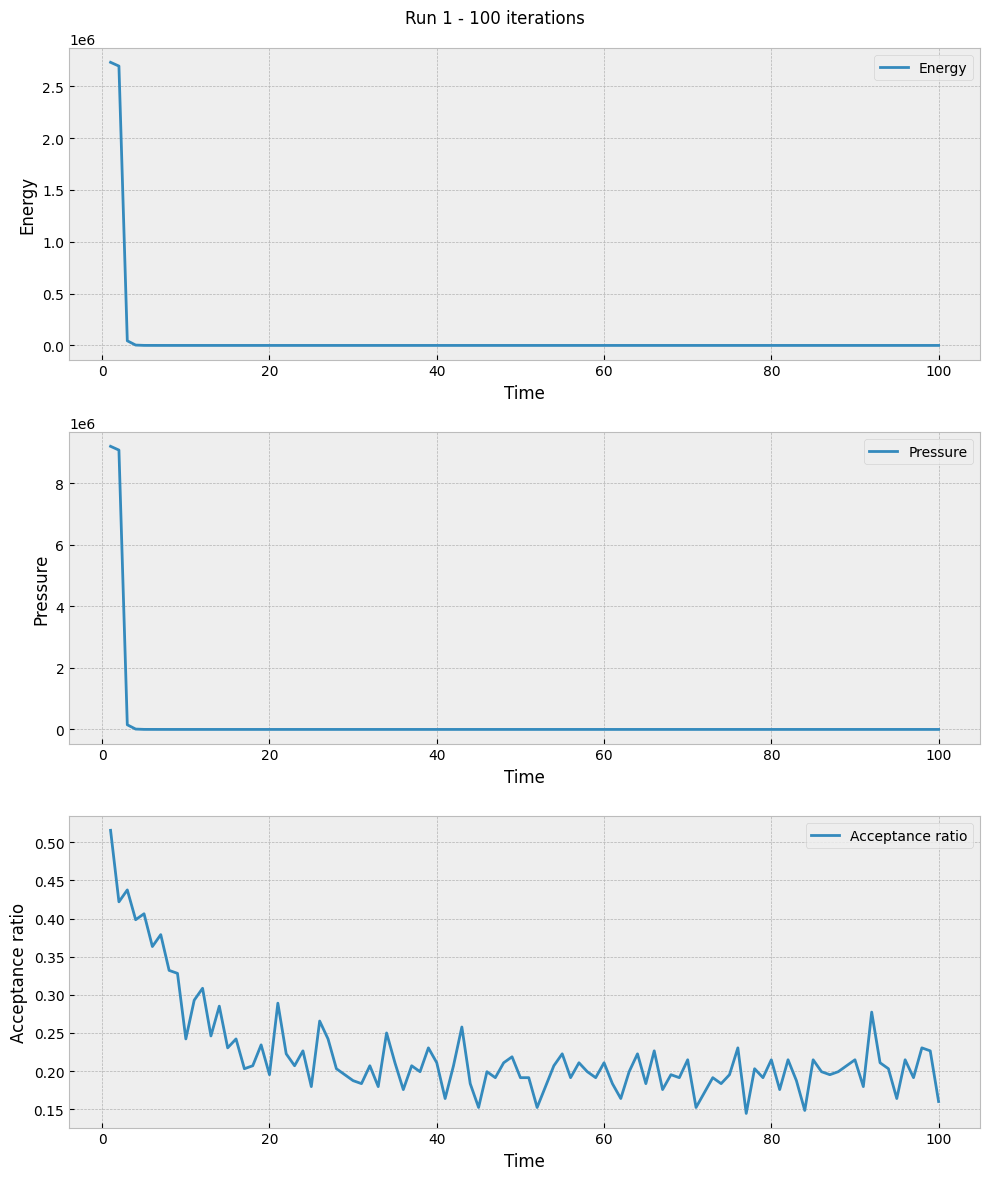

In [57]:
# Run 1

# read data
df_1 = pd.read_csv("results/sim_30.dat", header=None, sep="\s+", index_col=0)

fig, axs = plt.subplots(3,1, figsize=(10,12))

# plot energy
axs[0].plot(df_1.index, df_1[2], label="Energy")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Energy")
axs[0].legend()

# plot pressure
axs[1].plot(df_1.index, df_1[3], label="Pressure")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Pressure")
axs[1].legend()

# plot accepptance ratio
axs[2].plot(df_1.index, df_1[1], label="Acceptance ratio")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Acceptance ratio")
axs[2].legend()

# title 
fig.suptitle("Run 1 - 100 iterations")

fig.tight_layout()
plt.show()

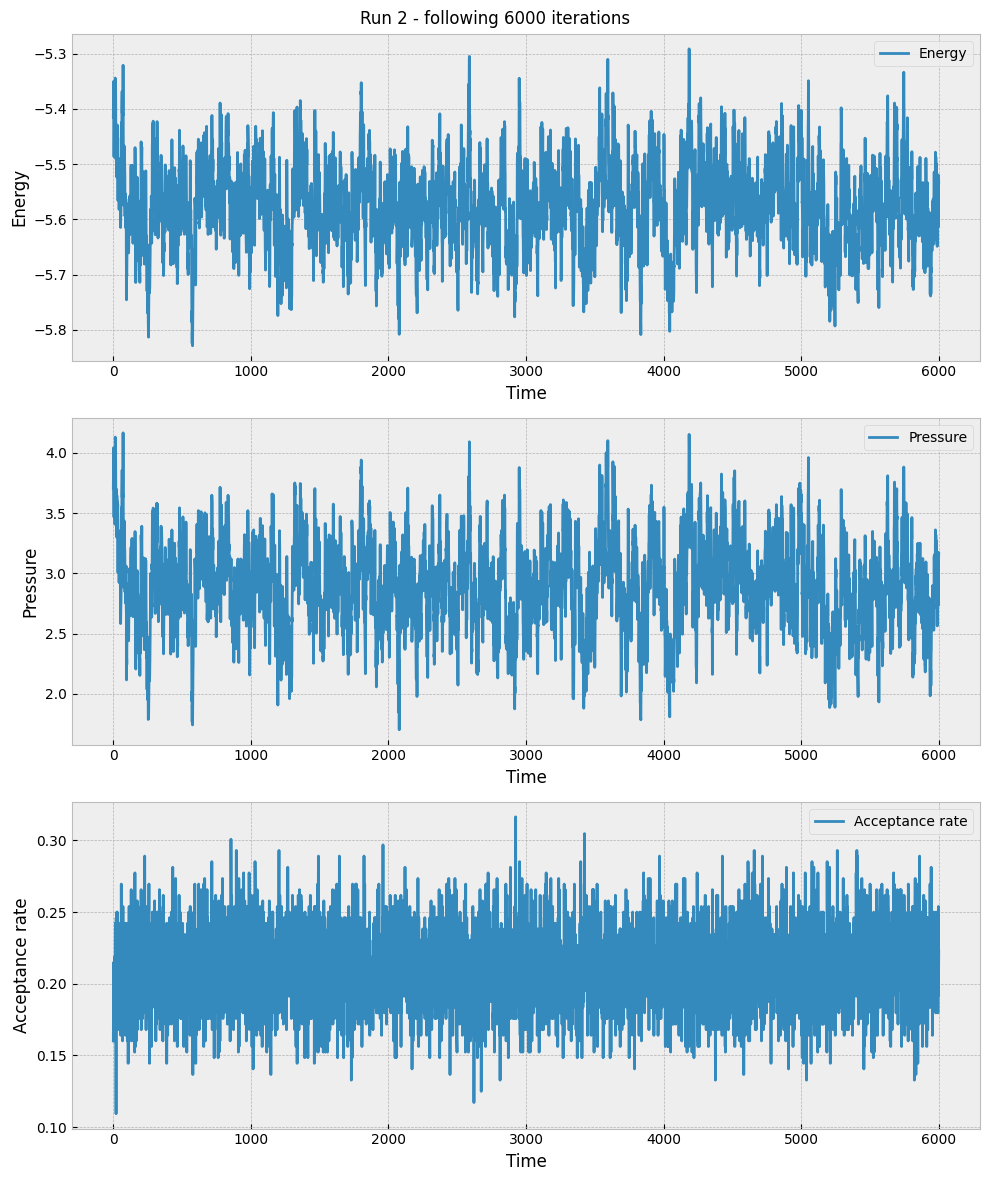

In [58]:
# Run 2

# read data
df_2 = pd.read_csv("results/sim_30_run_2.dat", header=None, sep="\s+", index_col=0)

fig, axs = plt.subplots(3,1, figsize=(10,12))

# plot energy
axs[0].plot(df_2.index, df_2[2], label="Energy")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Energy")
axs[0].legend()

# plot pressure
axs[1].plot(df_2.index, df_2[3], label="Pressure")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Pressure")
axs[1].legend()

# plot acceptance rate
axs[2].plot(df_2.index, df_2[1], label="Acceptance rate")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Acceptance rate")
axs[2].legend()

# title 
fig.suptitle("Run 2 - following 6000 iterations")

fig.tight_layout()
plt.show()

In [59]:
print(f"mean energy U*:\t\t {df_2[1].mean():.4f}")
print(f"std of energy U*:\t {df_2[1].std():.4f} \n")
U_mean = df_2[1].mean() * eps_over_kB *constants.k * constants.N_A / 1e3
U_std = df_2[1].std() * eps_over_kB *constants.k * constants.N_A / 1e3
print(f"mean energy U: \t\t {U_mean:.4f} kJ/mol")
print(f"std of energy U: \t {U_std:.4f} kJ/mol")
print(64*"-")

print(f"mean pressure: \t\t{df_2[2].mean():.4f}")
print(f"std of pressure: \t{df_2[2].std():.4f} \n")
P_mean = df_2[2].mean() * eps_over_kB *constants.k / (1e-10 * sigma)**3 / 1e5
P_std = df_2[2].std() * eps_over_kB *constants.k / (1e-10 * sigma)**3 / 1e5
print(f"mean pressure P: \t {P_mean:.4f} bar")
print(f"std of pressure P: \t {P_std:.4f} bar")


mean energy U*:		 0.2103
std of energy U*:	 0.0261 

mean energy U: 		 0.2094 kJ/mol
std of energy U: 	 0.0259 kJ/mol
----------------------------------------------------------------
mean pressure: 		-5.5755
std of pressure: 	0.0750 

mean pressure P: 	 -2335.9903 bar
std of pressure P: 	 31.4133 bar


In [60]:
C_V_star = np.var(df_2[1] * n)/(T_star**2) / n
C_V = C_V_star * constants.k * constants.N_A

print(64*"-")
print(f" C_V* = \t{C_V_star:.4f}")
print(f" C_V = \t\t{C_V:.4f} J/(mol K)")


----------------------------------------------------------------
 C_V* = 	0.3550
 C_V = 		2.9520 J/(mol K)


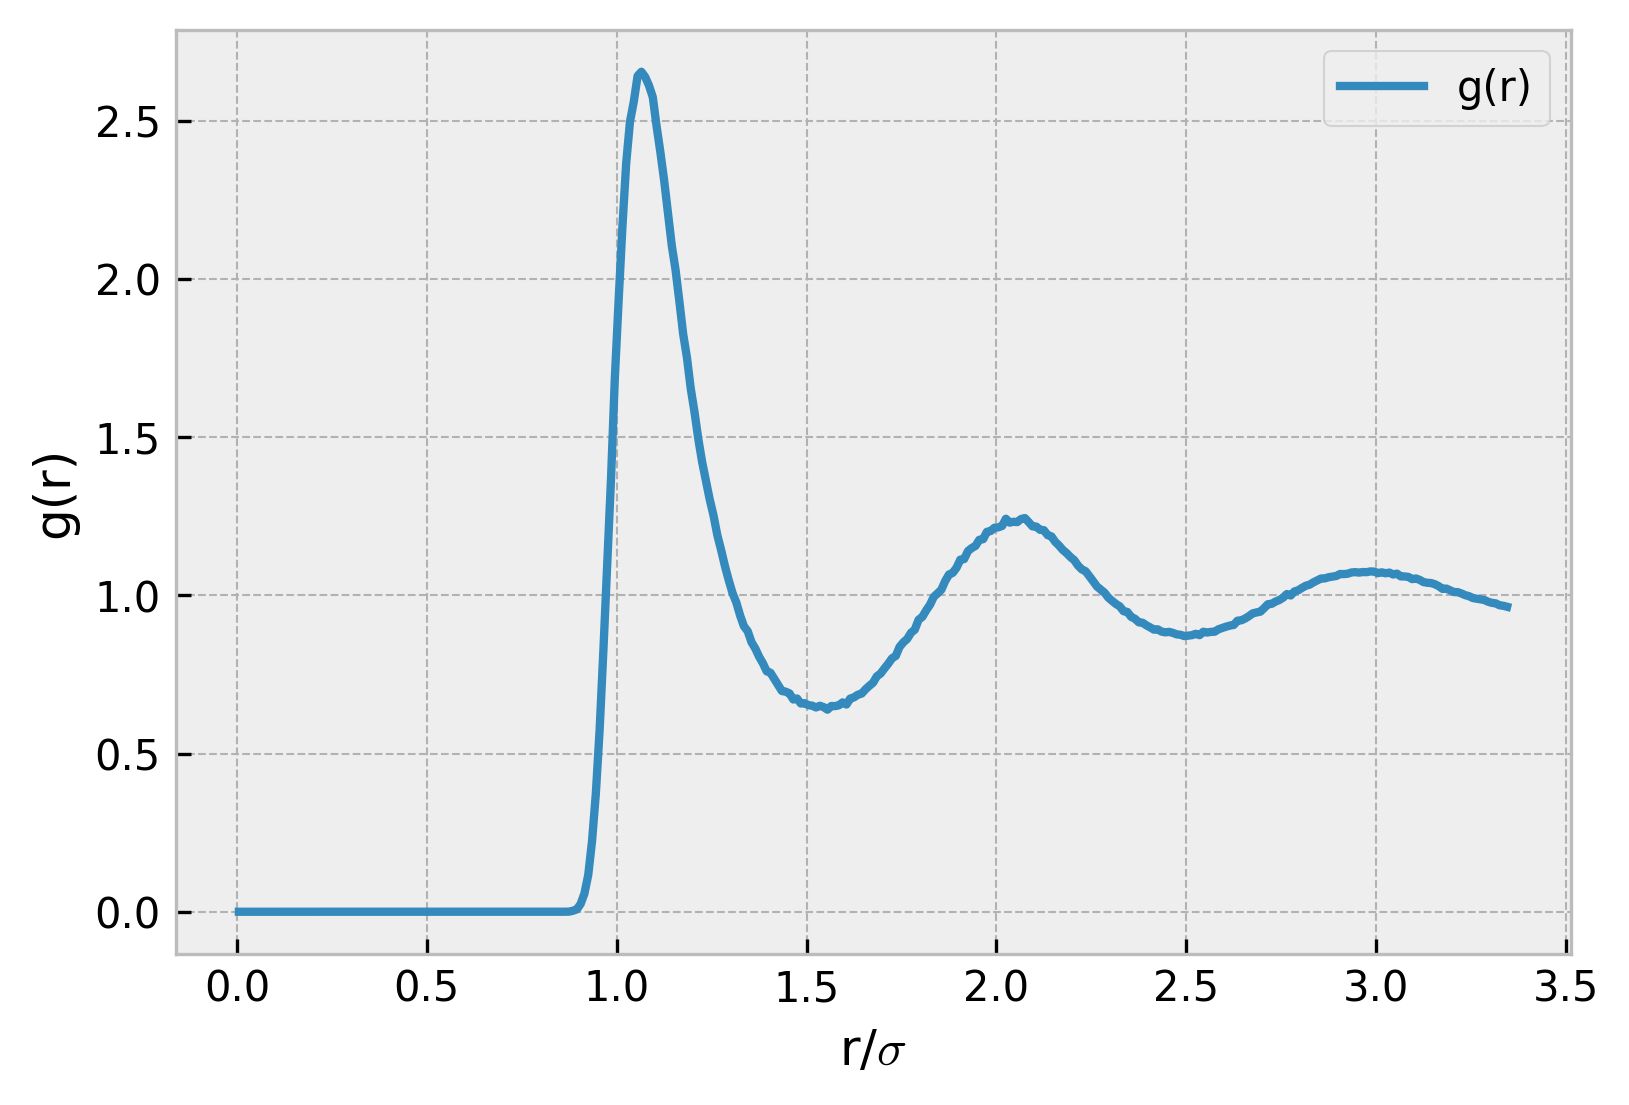

In [61]:
# pair correlation function

df_g = pd.read_csv("results/sim_30_amclj.dat", header=None, sep="\s+")

plt.figure(figsize=(6,4), dpi=300)
plt.plot(df_g[0], df_g[1], label="g(r)")
plt.xlabel("r/$\sigma$")
plt.ylabel("g(r)")
plt.legend()
plt.show()